<a href="https://colab.research.google.com/github/StephJones87/unicorn/blob/main/draft_1_pyladies_graph_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import requests
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

In [53]:
# setting the variables

api_url = 'https://clinicaltrials.gov/api/v2/studies?'

#condition = 'endometriosis'
#condition = 'menopause'
condition = 'Polycystic Ovary Syndrome'
# condition = 'Adenomyosis'
# condition = 'Erectile Dysfunction'


query_parameters = {
    "query.cond": condition,
    "fields": "ProtocolSection",
    "pageSize": '10000',
    "format": "json"
}

In [54]:
def get_clinical_trial_info(api_endpoint, params={}):
        response = requests.get(api_endpoint, params=params)
        data = response.json()
        return data

In [55]:
def extract_dates_from_data(data):
  dates_list = []
  for study in data['studies']:
    dates_list.append(study['protocolSection']['statusModule']['studyFirstSubmitDate'])
  return dates_list

In [56]:
def normalize_date(date_str):
    try:
        # Attempt to parse the date in various formats
        date_formats = ["%Y-%m-%d", "%d/%m/%Y", "%Y-%m"]
        for format_str in date_formats:
            try:
                date_obj = datetime.strptime(date_str, format_str)
                return date_obj.strftime("%Y-%m-%d")
            except ValueError:
                pass  # Try the next format
    except Exception as e:
        print(f"Error normalizing date '{date_str}': {e}")
    return None

In [57]:
def aggregate_dates_by_year(date_list):
    year_counts = defaultdict(int)
    for date_str in date_list:
      normalized_date = normalize_date(date_str)
      if normalized_date:
          year = normalized_date[:4]  # Extract the year
          year_counts[year] += 1

    return dict(year_counts)

In [58]:
def plot_bar_chart(data_dict, x_label, y_label, title):
    categories = list(data_dict.keys())
    counts = list(data_dict.values())

    # Generate a list of different colors for each bar
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

    # Create a bar graph with custom colors
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=colors[:len(categories)])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

    # Display the graph
    plt.tight_layout()
    plt.show()

820
Year: 1999, Count: 1
Year: 2000, Count: 3
Year: 2002, Count: 1
Year: 2003, Count: 1
Year: 2005, Count: 12
Year: 2006, Count: 13
Year: 2007, Count: 34
Year: 2008, Count: 33
Year: 2009, Count: 32
Year: 2010, Count: 37
Year: 2011, Count: 50
Year: 2012, Count: 50
Year: 2013, Count: 44
Year: 2014, Count: 44
Year: 2015, Count: 50
Year: 2016, Count: 35
Year: 2017, Count: 54
Year: 2018, Count: 52
Year: 2019, Count: 55
Year: 2020, Count: 43
Year: 2021, Count: 58
Year: 2022, Count: 53
Year: 2023, Count: 65


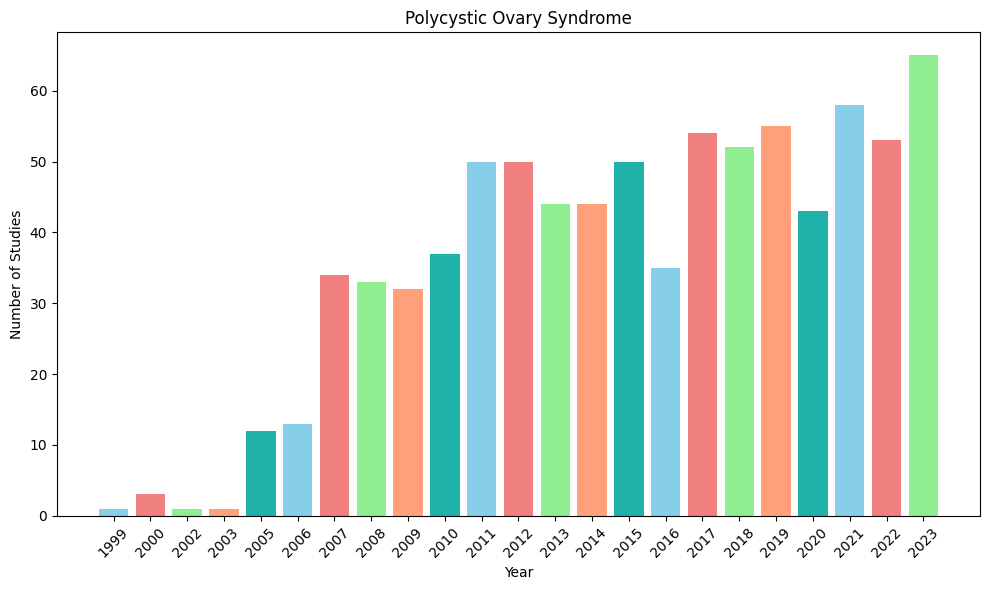

In [59]:
api_data = get_clinical_trial_info(api_url, query_parameters)
dates_data = extract_dates_from_data(api_data)
print(len(dates_data))
aggregated_data = aggregate_dates_by_year(dates_data)
sorted_year_counts = dict(sorted(aggregated_data.items()))  # Optional: Sort by year

for year, count in sorted_year_counts.items():
  print(f"Year: {year}, Count: {count}")

xlabel = "Year"
ylabel = "Number of Studies"
title = condition
plot_bar_chart(sorted_year_counts, xlabel, ylabel, title)